# Data description {-}
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls, where bank clients were called to subscribe for a term deposit. 

There is one train data - *train.csv*, which you will use to train models. There are two test datasets - *test1.csv* and *test2.csv*, which you will use to test your models. Each dataset has the following attributes about the clients called in the marketing campaign:

1) *age*: Age of the client\
2) *education*: Education level of the client \
3) *day*: Day of the month the call is made\
4) *month*: Month of the call \
5) *y*: did the client subscribe to a term deposit? \
6) *duration*: Call duration, in seconds. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call *y* is obviously known. Thus, this input should only be included for inference purposes and should be discarded if the intention is to have a realistic predictive model.

(Raw data source: [Source](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Do not use the raw data source for this assignment. It is just for reference.)

# Instructions / suggestions for answering questions{-} 

(1) **Instruction:** Use *train.csv* for all questions, unless otherwise stated.

(2) **Suggestion 1:** You may use the functions in the lecture notes for printing the confusion matrix and the overall classification accuracy based on test / train data. 

(3) **Suggestion 2:**: If you make variable transformations, you will need to do it for all the three datasets. Your code will be a bit concise if you make a function containing all the transformations, and then call it for the training and the two test datasets. You can put this function in the beginning of the code and keep adding transformations to it as you proceed with the assignment. You may need transformations in questions (1) and (13).

# Q1 {-} 
Read the datasets. Make an appropriate visualization to visualize how the proportion of clients subscribing to a term deposit changes with increasing call duration.

*(4 points for code)*

**Hints**: 

(a) Bin *duration* to create *duration_binned*. Group the data to find the proportion of clients responding positively to the marketing campaign for each bin in *duration_binned*. Make a lineplot of percentage of clients subscribing to a term deposit vs *duration_binned*, where the bins in *duration_binned* are arranged in increasing order of duration. \
(b) You may choose an appropriate number of bins & type of binning that helps you visualize well. \
(c) You may also think of other ways of visualization. You don't need to stick with this one.

In [1]:
#Importing Packages
import pandas as  pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

sns.set(style = "ticks", palette = "bright", rc = {'figure.figsize': (12,7)})

#Importing Data
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")
train = pd.read_csv("train.csv")

In [2]:
#Binning duration
labels  = ["Low Duration", "Low-Med Duration", "Med Duration", "Med-High Duration", "High Duration"]
train['duration_binned'] = pd.qcut(train['duration'], q=5, labels = labels)

<AxesSubplot:xlabel='duration_binned', ylabel='y'>

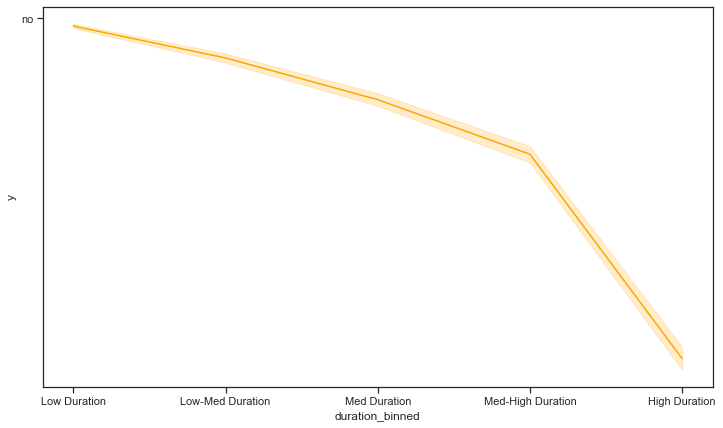

In [3]:
#Creating Lineplot
sns.lineplot(x = "duration_binned", y = "y", data = train, color = "orange")

# Q2 {-}
Based on the plot in (Q1), comment whether *duration* seems to be a useful variable to predict if the client will subscribe to a term deposit.

*(1 point for answer)*

**Based on the plot I created in Q1, duration seems to be a useful variable to predict if the client will subscribe to a term deposit due the clear trendline. However, if we take into account the warning provided at the beginning and the fact that duration has such a large incfluenceon y, it may not be a good idea afterall.**

# Q3 {-}
Develop a logisitic regression model to predict if the client subscribed to a term deposit based on call duration. Use the model to make a lineplot showing the probability of the client subscribing to a term deposit based on call duration.

*(3 points for code)*

Optimization terminated successfully.
         Current function value: 0.305028
         Iterations 7


<AxesSubplot:xlabel='duration', ylabel='y'>

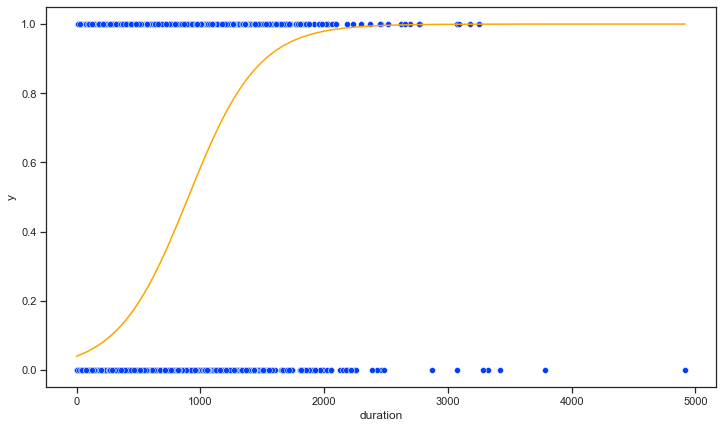

In [4]:
train.replace("yes", 1, inplace=True)
train.replace("no", 0, inplace=True)
test1.replace("yes", 1, inplace=True)
test1.replace("no", 0, inplace=True)
test2.replace("yes", 1, inplace=True)
test2.replace("no", 0, inplace=True)

logit_model = sm.logit(formula = 'y~duration', data = train).fit()
sns.lineplot(x = 'duration', y = logit_model.predict(train), data = train, color = 'orange')
sns.scatterplot(x = 'duration', y = 'y', data = train)

### Note {-} 
Answer questions (4) to (11) based on the regression model developed in (3).

# Q4 {-}
Is the regression model statistically significant? Justify your answer.

*(1 point for code, 1 point for answer)*

In [5]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34998
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                  0.1560
Time:                        20:17:01   Log-Likelihood:                -10676.
converged:                       True   LL-Null:                       -12650.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1841      0.030   -107.465      0.000      -3.242      -3.126
duration       0.0035   6.24e-05     56.446      0.000       0.003       0.004
==============================================================================
"""

**For a given value of duration at a significance level of 5%, the model is statistcally significant because the p-value is close 0 (well below the 0.05 threshold).**

# Q5 {-}
What is the probability that the client subscribes to a term deposit with a 5-minute marketing call? Note that the call duration in data is given in *seconds*.

*(2 points for code)*

In [6]:
data = {'duration': [300]}

In [7]:
logit_model.predict(data)

0    0.106491
dtype: float64

# Q6 {-}
What is the minimum call duration (in minutes) for which a client has a 95% or higher chance of subscribing to a term deposit?

*(3 points for code)*

In [8]:
((np.log(0.95/(1-0.95)) - logit_model.params['Intercept'])/logit_model.params['duration'])/60

28.989940038597855

# Q7 {-}
What is the maximum call duration (in minutes) in which a client refused to subscribe to a term deposit? Based on the model, what was the probability of the client subscribing to the term deposit in that call?

*(3 points for code)*

In [9]:
train.sort_values(by = "duration", ascending = False)

,age,education,day,month,y,duration,duration_binned
34120,59,tertiary,10,nov,0,4918,High Duration
11931,45,secondary,27,aug,0,3785,High Duration
1701,37,tertiary,7,aug,0,3422,High Duration
3046,43,tertiary,14,aug,0,3322,High Duration
21549,30,secondary,27,oct,0,3284,High Duration
...,...,...,...,...,...,...,...
968,28,secondary,9,sep,0,1,Low Duration
11106,39,secondary,7,apr,0,1,Low Duration
32132,35,secondary,26,aug,0,0,Low Duration
29964,53,primary,27,may,0,0,Low Duration


In [10]:
logit_model.predict({'duration': [4918]})

0    0.999999
dtype: float64

**The maximum call duration in minutes in which a client refused to subscribe was 4918 seconds or 81.9 minutes.**

# Q8 {-}
What is the percentage increase in the odds of a client subscribing to a term deposit when the call duration increases by a minute?

*(3 points for code)*

In [11]:
np.exp((logit_model.params['duration'])*60)

1.2354094217538658

# Q9 {-}
How much must the call duration increase (in minutes) so that it doubles the odds of the client subscribing to a term deposit.

*(3 points for code)*

In [12]:
(np.log(2) / logit_model.params['duration'])/60

3.278804213193095

# Q10 {-}
What is minimum overall classification accuracy of the model among the classifcation accuracies on *train.csv*, *test1.csv* and *test2.csv*? Consider a threshold of 30% when classifying observations.

*(3 points for code)*

In [13]:
def confusion_matrix_train(model, x):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold =  x))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = 100*(cm[0,0]+cm[1,1])/cm.sum()
    # Calculates the FNR
    FNR = cm[1,0] / (cm[1,0] + cm[1,1])
    return cm_df, accuracy, FNR

def confusion_matrix_test(data,actual_values,model, cutoff):
    #Predict the values using the Logit model
    pred_values = model.predict(data)
    # Specify the bins
    bins=np.array([0,cutoff,1])
    #Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    # Return the confusion matrix and the accuracy
    FNR = cm[1,0] / (cm[1,0] + cm[1,1])
    return cm_df, accuracy, FNR

In [14]:
confusion_matrix_train(logit_model, 0.3)

(          Predicted 0  Predicted 1
 Actual 0      29778.0       1118.0
 Actual 1       2896.0       1208.0,
 88.53142857142858,
 0.7056530214424951)

In [15]:
confusion_matrix_test(test1, test1.y, logit_model, cutoff = 0.3)

(          Predicted 0  Predicted 1
 Actual 0       4331.0        177.0
 Actual 1        414.0        178.0,
 0.8841176470588236,
 0.6993243243243243)

In [16]:
confusion_matrix_test(test2, test2.y, logit_model, cutoff = 0.3)

(          Predicted 0  Predicted 1
 Actual 0       4355.0        163.0
 Actual 1        418.0        175.0,
 0.8863236157307768,
 0.7048903878583473)

**Among the three, test1 has the minimum overall classification accuracy of the model.**

# Q11 {-}
What is maximum *false negative rate* of the model among the *false negative rates* on *train.csv*, *test1.csv* and *test2.csv*? Consider a threhold of 30% when classifying observations. 

False negative rate (FNR) is the proportion of positives which yield negative test outcomes with the test, i.e., the conditional probability of a negative test result given that the condition being looked for is present ([Source](https://en.wikipedia.org/wiki/False_positives_and_false_negatives#:~:text=A%20false%20negative%20error%2C%20or,acquitted%2C%20these%20are%20false%20negatives.)). Here, FNR will be the proportion of clients predicted to **not** subscribe to a term deposit among those who actually subscribed to a term deposit.

*(3 points for code)*

In [17]:
confusion_matrix_train(logit_model, 0.3)

(          Predicted 0  Predicted 1
 Actual 0      29778.0       1118.0
 Actual 1       2896.0       1208.0,
 88.53142857142858,
 0.7056530214424951)

In [18]:
confusion_matrix_test(test1, test1.y, logit_model, cutoff = 0.3)

(          Predicted 0  Predicted 1
 Actual 0       4331.0        177.0
 Actual 1        414.0        178.0,
 0.8841176470588236,
 0.6993243243243243)

In [19]:
confusion_matrix_test(test2, test2.y, logit_model, cutoff = 0.3)

(          Predicted 0  Predicted 1
 Actual 0       4355.0        163.0
 Actual 1        418.0        175.0,
 0.8863236157307768,
 0.7048903878583473)

**Among the three, train has the maximum false negative rate of the model.**

# Q12 {-}
Develop a logistic regression model to predict the probability of a client subscribing to a term deposit based on *age, education* and the two-factor interaction between *age* and *education*. Based on the model, answer:

(a) People with which type of education (primary / secondary / tertiary / unknown) have the highest percentage increase in odds of subscribing to a term deposit with a unit increase in age? Justify your answer. \
(b) What is the percentage increase in odds of a person subscribing to a term deposit for a unit increase in age, if the person has tertiary education. \
(c) What is the percentage increase in odds of a person subscribing to a term deposit for a unit increase in age, if the person has primary education.

*(1 point for developing the model, 3 points for (a), 3 points for (b), 3 points for (c))*

In [20]:
new_model = sm.logit(formula = 'y~age + education + age*education', data = train).fit()
new_model.summary()

Optimization terminated successfully.
         Current function value: 0.356771
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34992
Method:                           MLE   Df Model:                            7
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                 0.01288
Time:                        20:17:02   Log-Likelihood:                -12487.
converged:                       True   LL-Null:                       -12650.
Covariance Type:            nonrobust   LLR p-value:                 1.897e-66
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.6063      0.209    -22.083      0.000      -5.015      -4.197
education[T.secondary]         2.1168      0.231      9.180      0.000       1.665       2.569
education[T.tertiary]          2.8103      0.238     11.832      0.000       2.345       3.276
education[T.unknown]           2.6776      0.359      7.455      0.000       1.974       3.382
age                            0.0462      0.004     11.636      0.000       0.038       0.054
age:education[T.secondary]    -0.0371      0.005     -8.063      0.000      -0.046      -0.028
age:education[T.tertiary]     -0.0447      0.005     -9.230      0.000      -0.054      -0.035
age:education[T.unknown]      -0.0443      0.007     -5.957      0.000      -0.059      -0.030
==============================================================================================
"""

In [21]:
np.exp(new_model.params['age:education[T.tertiary]'] + new_model.params['age'])

1.0014824258262074

In [22]:
np.exp(new_model.params['age'])

1.0472364488380415

**A: People with a primary education have the highest percentage increase in odds of subscribing to a term deposit with a unit increase in age. The change in log-odds are all smaller than the primary education one which is represented by just "age".**

**B: If a person has a tertiary education, the increase in odds is 0.0014 or 0.14% increase.**

**C: If a person has a primary education, the increase in odds is .047 or 4.7% increase.**

# Q13 {-}
Develop a logistic regression model to predict the probability of a client subscribing to a term deposit based on *age, education, day* and *month*. The model must have: 

(a)  **Minimum** overall classification accuracy of 75% among the classifcation accuracies on *train.csv*, *test1.csv* and *test2.csv*. 

(b) **Maximum** false negative rate of 50% among the false negative rates on *train.csv*, *test1.csv* and *test2.csv*. 

**Print:** \
(i) the model summary, and the \
(ii) confusion matrices for all the three datasets - *train.csv*, *test1.csv* and *test2.csv*, along with the overall classification accuracies.


**Note that:** 

(i) You cannot use *duration* as a predictor. The predictor is not useful for prediction because its value is determined after the marketing call ends. However, after the call ends, we already know whether the client responded positively or negatively. That is why we have used *duration* only for inference in the previous questions. It helped us understand the effect of the length of the call on marketing success. 

(ii) It is possible to develop the model satisfying constrains (a) and (b) with just appropriate transformation(s) of the predictor(s). However, you may consider interactions if you wish. 

(iii) You are free to choose any value of thershold probability for classifying observations. However, you must use the same threshold on all the three datasets.

*(10 points for code)*

In [23]:
model = sm.logit(formula = 'y~age + I(age**2) + education + day + month + age * education + day * month', data = train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.322666
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34968
Method:                           MLE   Df Model:                           31
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                  0.1072
Time:                        20:17:03   Log-Likelihood:                -11293.
converged:                       True   LL-Null:                       -12650.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.1446      0.347      0.417      0.677      -0.536       0.825
education[T.secondary]         0.0492      0.217      0.227      0.821      -0.376       0.474
education[T.tertiary]          0.5063      0.225      2.254      0.024       0.066       0.947
education[T.unknown]           0.9275      0.327      2.833      0.005       0.286       1.569
month[T.aug]                   1.1418      0.185      6.159      0.000       0.778       1.505
month[T.dec]                   2.2415      0.340      6.601      0.000       1.576       2.907
month[T.feb]                  -0.1687      0.187     -0.904      0.366      -0.534       0.197
month[T.jan]                   4.4757      0.442     10.130      0.000       3.610       5.342
month[T.jul]                   0.5553      0.190      2.929      0.003       0.184       0.927
month[T.jun]                   0.4512      0.181      2.491      0.013       0.096       0.806
month[T.mar]                   2.5508      0.250     10.217      0.000       2.061       3.040
month[T.may]                  -0.1391      0.180     -0.774      0.439      -0.492       0.213
month[T.nov]                   2.6127      0.277      9.430      0.000       2.070       3.156
month[T.oct]                   0.9884      0.274      3.612      0.000       0.452       1.525
month[T.sep]                   1.8823      0.235      7.994      0.000       1.421       2.344
age                           -0.1386      0.011    -12.472      0.000      -0.160      -0.117
age:education[T.secondary]     0.0071      0.005      1.554      0.120      -0.002       0.016
age:education[T.tertiary]      0.0025      0.005      0.529      0.597      -0.007       0.012
age:education[T.unknown]      -0.0112      0.007     -1.626      0.104      -0.025       0.002
I(age ** 2)                    0.0015      0.000     14.878      0.000       0.001       0.002
day                            0.0565      0.008      7.249      0.000       0.041       0.072
day:month[T.aug]              -0.1109      0.010    -11.160      0.000      -0.130      -0.091
day:month[T.dec]              -0.0631      0.020     -3.170      0.002      -0.102      -0.024
day:month[T.feb]               0.0631      0.012      5.223      0.000       0.039       0.087
day:month[T.jan]              -0.2228      0.018    -12.422      0.000      -0.258      -0.188
day:month[T.jul]              -0.0797      0.010     -8.359      0.000      -0.098      -0.061
day:month[T.jun]              -0.0701      0.010     -6.736      0.000      -0.090      -0.050
day:month[T.mar]              -0.0756      0.014     -5.475      0.000      -0.103      -0.049
day:month[T.may]              -0.0575      0.009     -6.194      0.000      -0.076      -0.039
day:month[T.nov]              -0.1938      0.015    -12.746      0.000      -0.224      -0.164
day:month[T.oct]              -0.0029      0.014     -0.212      0.832      -0.030       0.024
day:month[T

In [24]:
confusion_matrix_train(model, 0.12)

(          Predicted 0  Predicted 1
 Actual 0      24593.0       6303.0
 Actual 1       1893.0       2211.0,
 76.58285714285714,
 0.4612573099415205)

In [25]:
confusion_matrix_test(test1, test1.y, model, cutoff = 0.12)

(          Predicted 0  Predicted 1
 Actual 0       3617.0        891.0
 Actual 1        286.0        306.0,
 0.7692156862745098,
 0.4831081081081081)

In [26]:
confusion_matrix_test(test2, test2.y, model, cutoff = 0.12)

(          Predicted 0  Predicted 1
 Actual 0       3581.0        937.0
 Actual 1        253.0        340.0,
 0.7671688514967717,
 0.4266441821247892)